Лабораторная работа номер 10. Вычисление кратных интегралов

Упражнение 1

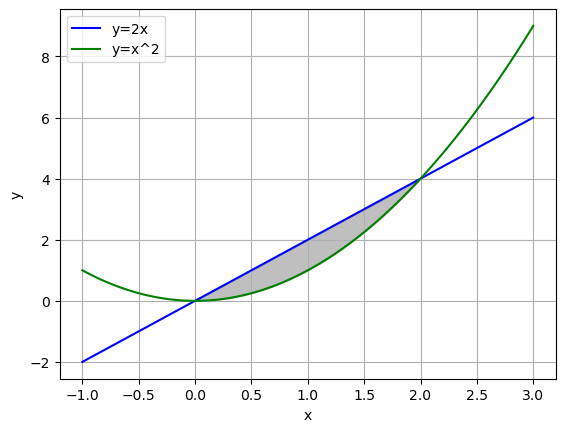

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

x = np.linspace(-1, 3, 100)
y1 = 2*x
y2 = x**2

plt.plot(x, y1, color='b', label='y=2x')
plt.plot(x, y2, color='g', label='y=x^2')
plt.fill_between(x, y1, y2, where=y1>y2, color='gray', alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [7]:
x, y = sp.symbols('x, y')
f = x + y**2
a, b = (0, 2)
c, d = (x**2, 2*x)

Iy = sp.integrate(f, (y, c, d))
Ix = sp.integrate(Iy, (x, a, b))
print(f'I = {float(Ix)}')

I = 5.904761904761905


In [10]:
a, b = (0, 4)
c, d = (y/2, y**(1/2))

Ix = sp.integrate(f, (x, c, d))
Iy = sp.integrate(Ix, (y, a, b))
print(f'I = {float(Iy)}')

I = 5.904761904761905


Упражнение 2

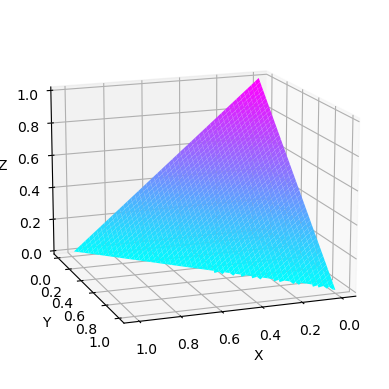

In [14]:
from matplotlib import cm

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = 1 - X - Y
Z[Z < 0] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 70)
plt.show()

In [15]:
x, y, z = sp.symbols('x, y, z')
f = 1 - x - y
integral = sp.integrate(f, (x, 0, 1-y-z), (y, 0, 1-z), (z, 0, 1))
print(integral)

1/12


Упражнение 3

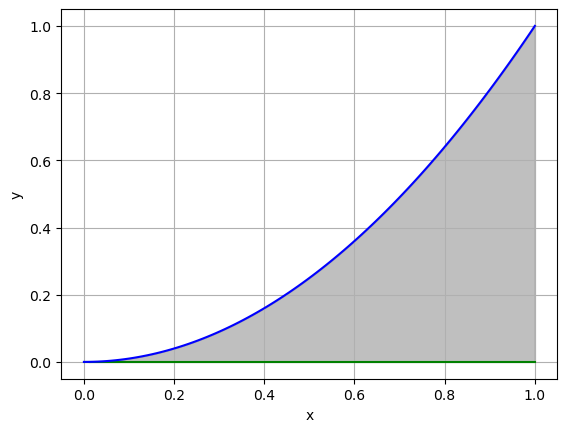

In [21]:
x = np.linspace(0, 1, 100)
y1 = np.zeros(100)
y2 = x**2

plt.plot(x, y1, 'g')
plt.plot(x, y2, 'b')
plt.fill_between(x, y1, y2, where=y1<y2, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [27]:
x, y = sp.symbols('x, y')
f = x * (1-y)**(1/2)
integral = sp.integrate(f, (y, 0, x**2), (x, 0, 1))
result = integral.evalf()
print(result)

0.200000000000000


In [26]:
result = integral.evalf()
print(result)

0.200000000000000


Упражнение С1

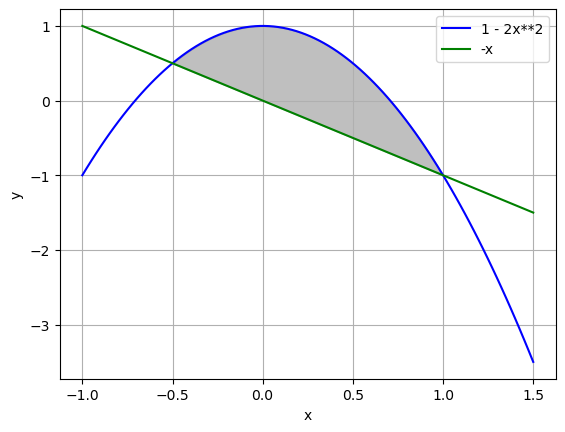

In [35]:
x = np.linspace(-1, 3/2, 100)
y1 = 1 - 2*x**2
y2 = -x

plt.plot(x, y1, color='b', label='1 - 2x**2')
plt.plot(x, y2, color='g', label='-x')
plt.fill_between(x, y1, y2, where=y1>y2, color='gray', alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [42]:
x, y = sp.symbols('x, y')
f = sp.sin(x*y)
integral = sp.integrate(f, (y, -x, 1 - 2*x**2), (x, -1/2, 1))
result = integral.evalf().evalf()
print(result)

Integral(-cos(x**2)/x, (x, -0.5)) - Integral(-cos(x**2)/x, (x, 1)) + Integral(cos(2*x**3 - x)/x, (x, -0.5)) - Integral(cos(2*x**3 - x)/x, (x, 1))


Упражнение С2

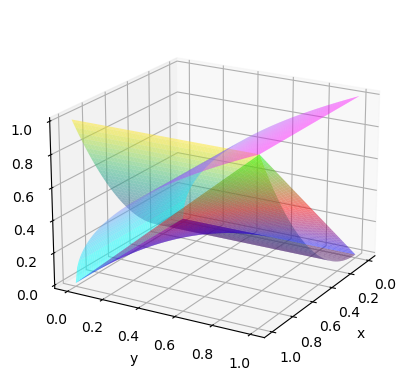

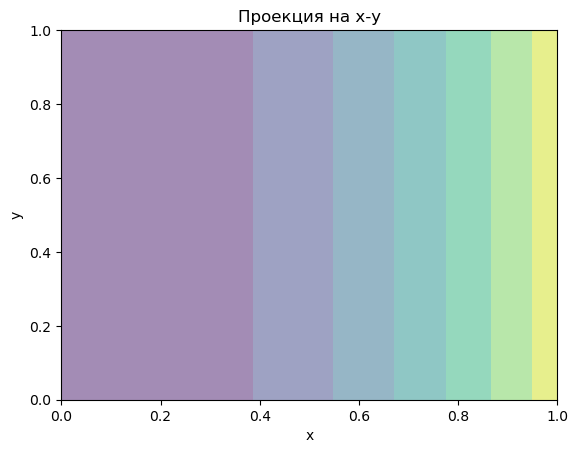

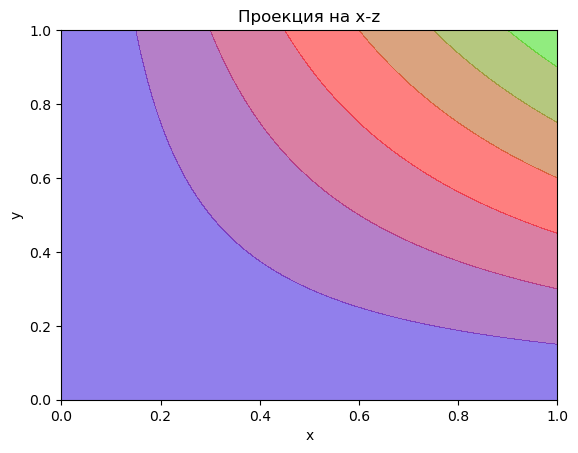

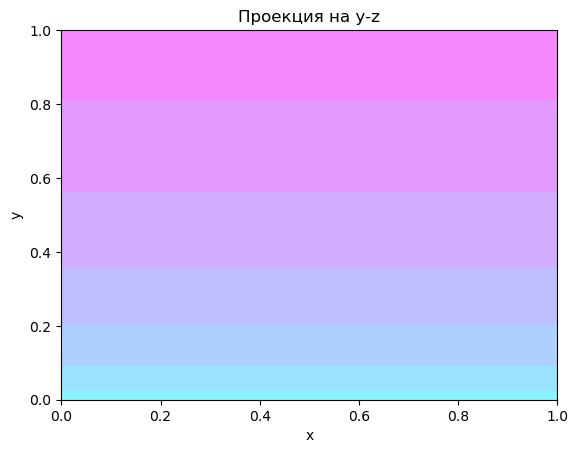

In [56]:
def f1(x):
    return x**2

def f2(y):
    return np.sqrt(y)

def f3(x, y):
    return x*y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

Z1 = f1(X)
Z2 = f2(Y)
Z3 = f3(X, Y)

ax.plot_surface(X, Y, Z1, cmap = 'viridis', alpha=0.5)
ax.plot_surface(X, Y, Z2, cmap = 'cool', alpha=0.5)
ax.plot_surface(X, Y, Z3, cmap = 'brg', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(20, 30)


# Проекции
plt.figure()
plt.contourf(X, Y, Z1, cmap='viridis', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Проекция на x-y')

plt.figure()
plt.contourf(X, Y, Z3, cmap='brg', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Проекция на x-z')

plt.figure()
plt.contourf(X, Y, Z2, cmap='cool', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Проекция на y-z')

plt.show()

In [53]:
x, y, z = sp.symbols('x y z')
f = x*y*z

x_limits = (0, 1)
y_limits = (0, x**2)
z_limits = (0, x*y)

integral = sp.integrate(f, (z, *z_limits), (y, *y_limits), (x, *x_limits))
print(integral)

1/96


Упражнение C3

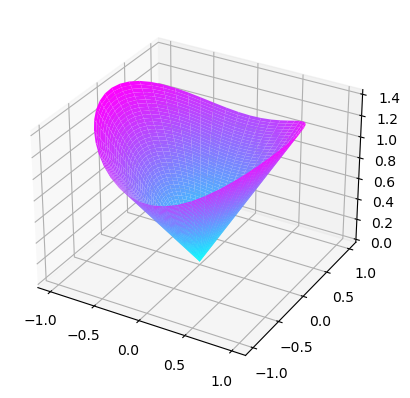

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = np.linspace(0, 1, 50)
o = np.linspace(0, 2*np.pi, 50)
R, O = np.meshgrid(r, o)

X = R*np.sin(O)
Y = R*np.cos(O)
Z = (X**2 + Y**2 + X**2)**0.5

ax.plot_surface(X, Y, Z, cmap = 'cool')
plt.show()

In [62]:
r, O, phi = sp.symbols('r O phi')
x = r*sp.sin(phi)*sp.cos(O)
y = r*sp.sin(phi)*sp.sin(O)
z = r*sp.cos(phi)

J = sp.Matrix([[sp.diff(x, r), sp.diff(x, O), sp.diff(x, phi)],
               [sp.diff(y, r), sp.diff(y, O), sp.diff(y, phi)],
               [sp.diff(z, r), sp.diff(z, O), sp.diff(z, phi)]])
print(J.det().simplify())

f = (r**2)**(1/2) * r**2 * sp.sin(phi)

integral = sp.integrate(f * J.det(), (phi, 0, sp.pi/2), (O, 0, 2*sp.pi), (r, 0, 1))
print(integral)

-r**2*sin(phi)
-0.0833333333333333*pi**2


In [66]:
x, y, z = sp.symbols('x, y, z')
f = sp.sqrt(x**2 + y**2 + x**2)
integral = sp.integrate(f, (x, 0, (z - z**2 - y**2)**(1/2)), (y, 0, (z-z**2-x**2)**(1/2)), (z, 0, 1))
result = integral.evalf()
print(result)

0.25*Integral(sqrt(2)*y**2*asinh(sqrt(2)*(-y**2 - z**2 + z)**0.5/y), (y, 0, (-x**2 - z**2 + z)**0.5), (z, 0, 1)) + 0.25*Integral(2*y*sqrt(1 + 2*(-y**2 - z**2 + z)**1.0/y**2)*(-y**2 - z**2 + z)**0.5, (y, 0, (-x**2 - z**2 + z)**0.5), (z, 0, 1))
